# Importação dos pacotes e bibliotecas e leitura do dataset reduzido.

---



In [ ]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
diretorio = r"df_novo.parquet"
arquivos_parquet = glob.glob(os.path.join(diretorio, '*.parquet'))

In [ ]:
df = pd.concat([pd.read_parquet(arquivo) for arquivo in arquivos_parquet])
df.head()

,CO_ACOMPANHAMENTO,CO_PESSOA_SISVAN,ST_PARTICIPA_ANDI,CO_MUNICIPIO_IBGE,SG_UF,NO_MUNICIPIO,CO_CNES,NU_IDADE_ANO,NU_FASE_VIDA,DS_FASE_VIDA,...,PESO X ALTURA,CRI. ALTURA X IDADE,CRI. IMC X IDADE,ADO. ALTURA X IDADE,ADO. IMC X IDADE,CO_ESTADO_NUTRI_ADULTO,CO_ESTADO_NUTRI_IDOSO,CO_ESTADO_NUTRI_IMC_SEMGEST,CO_SISTEMA_ORIGEM_ACOMP,SISTEMA_ORIGEM_ACOMP
0,4F4E28BC37315767A96D44BD1E8DCBC08E2CADDD,C8C955AE62152ACA6AE4638A80BEA8DBBA3F9A97,None,292510,BA,POCOES,2556855,8,5.0,ENTRE 7 ANOS A 10 ANOS,...,None,Estatura adequada para a idade,Eutrofia,None,None,None,None,None,4,E-SUS AB
1,B23EF32106A09F2903449D351B264BD748F9E180,C10636171A5E0535AF7D2450F2787C724B34F329,None,210317,MA,CENTRO NOVO DO MARANHAO,2311151,9,5.0,ENTRE 7 ANOS A 10 ANOS,...,None,Estatura adequada para a idade,Eutrofia,None,None,None,None,None,4,E-SUS AB
2,1C4ADE734F163310B01395D22BAB00A4D96FC327,7C08F18291C5B26EAD8EA37B6EA46F7F3A8A7C69,None,260890,PE,LIMOEIRO,2350513,9,5.0,ENTRE 7 ANOS A 10 ANOS,...,None,Estatura adequada para a idade,Eutrofia,None,None,None,None,None,4,E-SUS AB
3,1F6F7AB36C15A2AFD023792AF84A66BC07CF9F74,0D3EBC036B1B2623E936C063B1E8EDBB7A9E815F,None,250800,PB,JURU,7284276,8,5.0,ENTRE 7 ANOS A 10 ANOS,...,None,Estatura adequada para a idade,Eutrofia,None,None,None,None,None,4,E-SUS AB
4,603287082D9A73A20CE21E33E0F4E895DEE64F4F,48BEEB4F6F69745E5CE0CAC56BFCFFAF0BA473C8,None,270310,AL,IGACI,2007576,9,5.0,ENTRE 7 ANOS A 10 ANOS,...,None,Estatura adequada para a idade,Eutrofia,None,None,None,None,None,4,E-SUS AB


# Primeiras impressões do dataset
#### * Contagem de linhas e colunas
#### * Identificação dos tipos dos dados
#### * Verificação de valores duplicados
#### * Contagem de nulos

In [ ]:
print(f'O dataset reduzido, antes do tratamento, tem {df.shape[0]} linhas e {df.shape[1]} colunas.')

O dataset reduzido, antes do tratamento, tem 4041463 linhas e 34 colunas.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4041463 entries, 0 to 23183
Data columns (total 34 columns):
 #   Column                       Dtype 
---  ------                       ----- 
 0   CO_ACOMPANHAMENTO            object
 1   CO_PESSOA_SISVAN             object
 2   ST_PARTICIPA_ANDI            object
 3   CO_MUNICIPIO_IBGE            object
 4   SG_UF                        object
 5   NO_MUNICIPIO                 object
 6   CO_CNES                      object
 7   NU_IDADE_ANO                 object
 8   NU_FASE_VIDA                 object
 9   DS_FASE_VIDA                 object
 10  SG_SEXO                      object
 11  CO_RACA_COR                  object
 12  DS_RACA_COR                  object
 13  CO_POVO_COMUNIDADE           object
 14  DS_POVO_COMUNIDADE           object
 15  CO_ESCOLARIDADE              object
 16  DS_ESCOLARIDADE              object
 17  DT_ACOMPANHAMENTO            object
 18  NU_COMPETENCIA               object
 19  NU_PESO                     

#### Como todos os dados são do tipo object, vamos precisar converter na etapa de tratamento do dataset alguns deles para tipos numéricos (como os dados de peso, idade e altura).

In [ ]:
#Verificando se há dados duplicados (não há)
df.duplicated().sum()

0

#### Vamos contar o número de nulos de cada coluna. Para isso, criamos a função **proporcao_de_nulos()**, que retorna a porcentagem de valores nulos de cada atributo.  

In [ ]:
def proporcao_de_nulos(df):
  colunas = df.columns
  for col in colunas:
    nulos = df[col].isnull().sum() #conta o número de nulos a cada iteração
    proporcao = nulos/len(df)
    if round(proporcao * 100, 2) > 0:
        print(f'A coluna {col} apresenta {round(proporcao * 100, 2)}% de nulos.')


In [ ]:
proporcao_de_nulos(df)

A coluna ST_PARTICIPA_ANDI apresenta 100.0% de nulos.
A coluna CO_CNES apresenta 0.43% de nulos.
A coluna CO_POVO_COMUNIDADE apresenta 99.85% de nulos.
A coluna CO_ESCOLARIDADE apresenta 76.31% de nulos.
A coluna DS_IMC_PRE_GESTACIONAL apresenta 100.0% de nulos.
A coluna PESO X ALTURA apresenta 45.05% de nulos.
A coluna CRI. ALTURA X IDADE apresenta 0.01% de nulos.
A coluna ADO. ALTURA X IDADE apresenta 100.0% de nulos.
A coluna ADO. IMC X IDADE apresenta 100.0% de nulos.
A coluna CO_ESTADO_NUTRI_ADULTO apresenta 100.0% de nulos.
A coluna CO_ESTADO_NUTRI_IDOSO apresenta 100.0% de nulos.
A coluna CO_ESTADO_NUTRI_IMC_SEMGEST apresenta 100.0% de nulos.


#### Verificamos que colunas que já não eram interessantes para a nossa análise (como as que trazem dados da população adulta, idosa e adolescente) apresentam 100% de dados vazios. Portanto, não há motivos para mantê-las no nosso dataset.
#### No entando, identificamos um ponto de atenção: a coluna "PESO X ALTURA", que contém dados interessantes para a nossa análise, apresenta quase metade dos dados nulos (45%). Diante disso, precisaremos decidir se vamos descartar a coluna ou mantê-la, mas suprimindo as entradas que contêm valores nulos.

# Tratamento do dataset
## Nesta etapa vamos fazer os seguintes ajustes:
#### * Excluir colunas e linhas desnecessárias para a nossa análise
#### * Converter os tipos dos dados, quando necessário
#### * Renomear as colunas



In [ ]:
df.columns


Index(['CO_ACOMPANHAMENTO', 'CO_PESSOA_SISVAN', 'ST_PARTICIPA_ANDI',
       'CO_MUNICIPIO_IBGE', 'SG_UF', 'NO_MUNICIPIO', 'CO_CNES', 'NU_IDADE_ANO',
       'NU_FASE_VIDA', 'DS_FASE_VIDA', 'SG_SEXO', 'CO_RACA_COR', 'DS_RACA_COR',
       'CO_POVO_COMUNIDADE', 'DS_POVO_COMUNIDADE', 'CO_ESCOLARIDADE',
       'DS_ESCOLARIDADE', 'DT_ACOMPANHAMENTO', 'NU_COMPETENCIA', 'NU_PESO',
       'NU_ALTURA', 'DS_IMC', 'DS_IMC_PRE_GESTACIONAL', 'PESO X IDADE',
       'PESO X ALTURA', 'CRI. ALTURA X IDADE', 'CRI. IMC X IDADE',
       'ADO. ALTURA X IDADE', 'ADO. IMC X IDADE', 'CO_ESTADO_NUTRI_ADULTO',
       'CO_ESTADO_NUTRI_IDOSO', 'CO_ESTADO_NUTRI_IMC_SEMGEST',
       'CO_SISTEMA_ORIGEM_ACOMP', 'SISTEMA_ORIGEM_ACOMP'],
      dtype='object')

In [ ]:
df_limpa = df.drop(['CO_ACOMPANHAMENTO','DT_ACOMPANHAMENTO', 'NU_COMPETENCIA','CO_PESSOA_SISVAN', 'CO_MUNICIPIO_IBGE', 'CO_CNES', 'CO_RACA_COR', 'CO_POVO_COMUNIDADE', 'DS_POVO_COMUNIDADE','CO_ESCOLARIDADE',
       'DS_ESCOLARIDADE', 'ADO. ALTURA X IDADE', 'ADO. IMC X IDADE', 'CO_ESTADO_NUTRI_ADULTO',
       'CO_ESTADO_NUTRI_IDOSO', 'CO_ESTADO_NUTRI_IMC_SEMGEST','NU_FASE_VIDA',
       'CO_SISTEMA_ORIGEM_ACOMP', 'SISTEMA_ORIGEM_ACOMP', 'DS_IMC_PRE_GESTACIONAL', 'ST_PARTICIPA_ANDI'], axis = 1)

In [ ]:
df_limpa.head()

,SG_UF,NO_MUNICIPIO,NU_IDADE_ANO,DS_FASE_VIDA,SG_SEXO,DS_RACA_COR,NU_PESO,NU_ALTURA,DS_IMC,PESO X IDADE,PESO X ALTURA,CRI. ALTURA X IDADE,CRI. IMC X IDADE
0,BA,POCOES,8,ENTRE 7 ANOS A 10 ANOS,M,PARDA,27,"133,5","15,15",Peso adequado para idade,None,Estatura adequada para a idade,Eutrofia
1,MA,CENTRO NOVO DO MARANHAO,9,ENTRE 7 ANOS A 10 ANOS,F,PARDA,"23,8",126,"14,99",Peso adequado para idade,None,Estatura adequada para a idade,Eutrofia
2,PE,LIMOEIRO,9,ENTRE 7 ANOS A 10 ANOS,M,BRANCA,26,137,"13,85",Peso adequado para idade,None,Estatura adequada para a idade,Eutrofia
3,PB,JURU,8,ENTRE 7 ANOS A 10 ANOS,F,BRANCA,"21,4",125,"13,7",Peso adequado para idade,None,Estatura adequada para a idade,Eutrofia
4,AL,IGACI,9,ENTRE 7 ANOS A 10 ANOS,M,PARDA,"26,5",124,"17,23",Peso adequado para idade,None,Estatura adequada para a idade,Eutrofia


### Como vamos considerar na nossa análise apenas as crianças de 0 a 6 anos, vamos eliminar as linhas correspondentes às crianças com mais de 6 anos.

In [ ]:
#Verificando os valores únicos da coluna que traz as faixas etárias existentes no dataset

df_limpa['DS_FASE_VIDA'].unique()

array(['ENTRE 7 ANOS A 10 ANOS', 'ENTRE 2 ANOS A 5 ANOS',
       'ENTRE 6 MESES A 2 ANOS', 'MENOR DE 6 MESES',
       'ENTRE 5 ANOS A 7 ANOS'], dtype=object)

In [ ]:
#Excluindo as linhas referentes a crianças com idade maior que 6 anos
df_limpa = df_limpa[df_limpa['DS_FASE_VIDA'] != 'ENTRE 7 ANOS A 10 ANOS']


## Conversão dos tipos dos dados

In [ ]:
df_limpa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3117647 entries, 5 to 23183
Data columns (total 13 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   SG_UF                object
 1   NO_MUNICIPIO         object
 2   NU_IDADE_ANO         object
 3   DS_FASE_VIDA         object
 4   SG_SEXO              object
 5   DS_RACA_COR          object
 6   NU_PESO              object
 7   NU_ALTURA            object
 8   DS_IMC               object
 9   PESO X IDADE         object
 10  PESO X ALTURA        object
 11  CRI. ALTURA X IDADE  object
 12  CRI. IMC X IDADE     object
dtypes: object(13)
memory usage: 333.0+ MB


In [ ]:
df_limpa[['NU_PESO', 'DS_IMC', 'NU_ALTURA']]
#As colunas que trazem os dados referentes ao peso, IMC e à altura das pessoas devem ser convertidas para o tipo float, mas antes da conversão vamos precisar substituir as vírgulas das casas decimais por ponto.

,NU_PESO,DS_IMC,NU_ALTURA
5,"13,5","15,95",92
8,17,17,100
9,"16,5","18,67",94
10,"11,2","14,46",88
12,13,"16,05",90
...,...,...,...
23179,"16,4","15,38",102
23180,"18,4","14,35",112
23181,18,"14,88",110
23182,15,"12,86",108


In [ ]:
#Fazendo a substituição das vírgulas por ponto
for col in ['NU_PESO', 'DS_IMC', 'NU_ALTURA']:
    df_limpa[col] = df_limpa[col].str.replace(',', '.')

In [ ]:
#Conferindo se a substituição de "," por "." foi feita

df_limpa[['NU_PESO', 'DS_IMC', 'NU_ALTURA']]

,NU_PESO,DS_IMC,NU_ALTURA
5,13.5,15.95,92
8,17,17,100
9,16.5,18.67,94
10,11.2,14.46,88
12,13,16.05,90
...,...,...,...
23179,16.4,15.38,102
23180,18.4,14.35,112
23181,18,14.88,110
23182,15,12.86,108


In [ ]:
#Convertendo as colunas para o tipo float

for col in ['NU_PESO', 'DS_IMC', 'NU_ALTURA']:
  df_limpa[col] = df_limpa[col].astype(float)

In [ ]:
#Convertendo a coluna das idades para o tipo int

df_limpa['NU_IDADE_ANO'] = df_limpa['NU_IDADE_ANO'].astype(int)

In [ ]:
#Verificando se a conversão foi feita

df_limpa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3117647 entries, 5 to 23183
Data columns (total 13 columns):
 #   Column               Dtype  
---  ------               -----  
 0   SG_UF                object 
 1   NO_MUNICIPIO         object 
 2   NU_IDADE_ANO         int64  
 3   DS_FASE_VIDA         object 
 4   SG_SEXO              object 
 5   DS_RACA_COR          object 
 6   NU_PESO              float64
 7   NU_ALTURA            float64
 8   DS_IMC               float64
 9   PESO X IDADE         object 
 10  PESO X ALTURA        object 
 11  CRI. ALTURA X IDADE  object 
 12  CRI. IMC X IDADE     object 
dtypes: float64(3), int64(1), object(9)
memory usage: 333.0+ MB


## Renomeando as colunas com títulos mais claros e informativos

In [ ]:
novas_colunas = ['UF', 'Município', 'Idade', 'Fase_da_vida', 'Gênero', 'Cor', 'Peso',
                 'Altura', 'IMC', 'Estado_nutricional_de peso_para_idade', 'Estado_nutricional_de_peso', 'Estado_nutricional_de_altura_para_idade',
                 'Estado_nutricional_de_IMC_para_idade']
df_limpa.columns = novas_colunas
df_limpa.head()

,UF,Município,Idade,Fase_da_vida,Gênero,Cor,Peso,Altura,IMC,Estado_nutricional_de peso_para_idade,Estado_nutricional_de_peso,Estado_nutricional_de_altura_para_idade,Estado_nutricional_de_IMC_para_idade
5,MA,PACO DO LUMIAR,2,ENTRE 2 ANOS A 5 ANOS,M,PARDA,13.5,92.0,15.95,Peso adequado para idade,Peso Adequado ou Eutrofico,Estatura adequada para a idade,Eutrofia
8,PI,CABECEIRAS DO PIAUI,2,ENTRE 2 ANOS A 5 ANOS,F,AMARELA,17.0,100.0,17.00,Peso adequado para idade,Risco de sobrepeso,Estatura adequada para a idade,Risco de sobrepeso
9,CE,FORTALEZA,2,ENTRE 2 ANOS A 5 ANOS,M,AMARELA,16.5,94.0,18.67,Peso adequado para idade,Sobrepeso,Estatura adequada para a idade,Sobrepeso
10,BA,CONDEUBA,2,ENTRE 2 ANOS A 5 ANOS,M,AMARELA,11.2,88.0,14.46,Peso adequado para idade,Peso Adequado ou Eutrofico,Estatura adequada para a idade,Eutrofia
12,PI,CAMPO MAIOR,1,ENTRE 6 MESES A 2 ANOS,F,AMARELA,13.0,90.0,16.05,Peso adequado para idade,Peso Adequado ou Eutrofico,Estatura adequada para a idade,Eutrofia


In [ ]:
#Consultando os tipos únicos de cada coluna

for col in df_limpa.columns:
  print(f'Coluna: {col}')
  print(df_limpa[col].unique())
  print("-" * 30)

Coluna: UF
['MA' 'PI' 'CE' 'BA' 'PE' 'AL' 'RN' 'PB' 'SE']
------------------------------
Coluna: Município
['PACO DO LUMIAR' 'CABECEIRAS DO PIAUI' 'FORTALEZA' ...
 'SAO LUIS DO PIAUI' 'MURICI DOS PORTELAS' 'CANHOBA']
------------------------------
Coluna: Idade
[2 1 4 3 0 5 6]
------------------------------
Coluna: Fase_da_vida
['ENTRE 2 ANOS A 5 ANOS' 'ENTRE 6 MESES A 2 ANOS' 'MENOR DE 6 MESES'
 'ENTRE 5 ANOS A 7 ANOS']
------------------------------
Coluna: Gênero
['M' 'F']
------------------------------
Coluna: Cor
['PARDA' 'AMARELA' 'BRANCA' 'SEM INFORMACAO' 'PRETA' 'INDIGENA']
------------------------------
Coluna: Peso
[13.5   17.    16.5   ... 21.962 27.584  3.842]
------------------------------
Coluna: Altura
[ 92.  100.   94.  ...  14.2 151.5  19.3]
------------------------------
Coluna: IMC
[15.95 17.   18.67 ... 97.22 57.31 38.33]
------------------------------
Coluna: Estado_nutricional_de peso_para_idade
['Peso adequado para idade' 'Peso elevado para a idade'
 'Baixo peso 

#### Ponto de atenção: Consultando os tipos únicos de cada variável, percebemos que o atributo "Cor", embora não tenha revelado nenhum dado nulo quando usamos o método isnull() para identificá-los anteriormente, apresenta dados "SEM INFORMAÇÃO". Como é um atributo importante para a nossa proposta analítica, vamos descobrir a proporção de ocorrências desta coluna para analisar se é viável utilizá-la.

In [ ]:
proporcao_de_dados_sem_informacao = (df_limpa[df_limpa['Cor'] == 'SEM INFORMACAO'].shape[0])/(df_limpa.shape[0])
proporcao_de_dados_sem_informacao

0.10222613400426668

#### Como apenas 10,2% dos dados não foram informados, esta coluna continua sendo relevante para a nossa análise.

## Recontando os nulos depois das transformações realizadas...

In [ ]:
proporcao_de_nulos(df_limpa)


A coluna Estado_nutricional_de peso_para_idade apresenta 0.01% de nulos.
A coluna Estado_nutricional_de_peso apresenta 28.77% de nulos.
A coluna Estado_nutricional_de_altura_para_idade apresenta 0.01% de nulos.


#### Após a exclusão das linhas correspondentes à faixa etária de 7 a 10 anos, a coluna "Estado_nutricional_de_peso" (antiga "PESO X ALTURA") passou a apresentar 28,77% de dados nulos. Uma proporção mais razoável, que não impede a análise.

In [ ]:
#Atualizando número de linhas e colunas após o tratamento
print(f'O dataset atualizado, após a eliminação das colunas e linhas desnecessárias, tem {df_limpa.shape[0]} linhas e {df_limpa.shape[1]} colunas.')

O dataset atualizado, após a eliminação das colunas e linhas desnecessárias, tem 3117647 linhas e 13 colunas.


# Análises estatísticas

In [ ]:
#Usando o método describe.() para calcular as principais métricas das variáveis numéricas

df_limpa.describe(include=[np.number])

,Idade,Peso,Altura,IMC
count,3.117647e+06,3.117647e+06,3.117647e+06,3.117647e+06
mean,3.095513e+00,1.594682e+01,9.634900e+01,1.659699e+01
std,2.012918e+00,7.467062e+00,1.993684e+01,3.746392e+00
min,0.000000e+00,1.000000e-02,1.000000e-01,0.000000e+00
25%,1.000000e+00,1.120000e+01,8.200000e+01,1.461000e+01
50%,3.000000e+00,1.515000e+01,1.000000e+02,1.602000e+01
75%,5.000000e+00,1.950000e+01,1.110000e+02,1.795000e+01
max,6.000000e+00,9.800000e+02,9.970000e+02,1.681900e+02


In [ ]:
df_limpa.columns

Index(['UF', 'Município', 'Idade', 'Fase_da_vida', 'Gênero', 'Cor', 'Peso',
       'Altura', 'IMC', 'Estado_nutricional_de peso_para_idade',
       'Estado_nutricional_de_peso', 'Estado_nutricional_de_altura_para_idade',
       'Estado_nutricional_de_IMC_para_idade'],
      dtype='object')

In [ ]:
variaveis_numericas = df_limpa[['Idade', 'Peso', 'Altura', 'IMC']]

In [ ]:
variaveis_categoricas = df_limpa[['UF', 'Município','Fase_da_vida', 'Gênero','Cor','Estado_nutricional_de peso_para_idade', 'Estado_nutricional_de_peso',
       'Estado_nutricional_de_altura_para_idade','Estado_nutricional_de_IMC_para_idade']]

## Medidas de tendência central (média, moda e mediana) das variáveis numéricas

In [ ]:
print('MÉDIA', end = "\n\n")
print(variaveis_numericas.mean())
print('-'*40)
print('MODA', end = "\n\n")
print(variaveis_numericas.mode())
print('-'*40)
print('MEDIANA', end = "\n\n")
print(variaveis_numericas.median())

MÉDIA

Idade      3.095513
Peso      15.946816
Altura    96.348998
IMC       16.596988
dtype: float64
----------------------------------------
MODA

   Idade  Peso  Altura    IMC
0      6  15.0   110.0  14.88
----------------------------------------
MEDIANA

Idade       3.00
Peso       15.15
Altura    100.00
IMC        16.02
dtype: float64


##Valores máximos e mínimos

In [ ]:
print('VALOR MÁXIMO', end = "\n\n")
print(variaveis_numericas.max())
print('-'*40)
print('VALOR MÍNIMO', end = "\n\n")
print(variaveis_numericas.min())

VALOR MÁXIMO

Idade       6.00
Peso      980.00
Altura    997.00
IMC       168.19
dtype: float64
----------------------------------------
VALOR MÍNIMO

Idade     0.00
Peso      0.01
Altura    0.10
IMC       0.00
dtype: float64


## Medida de tendência central (moda) das variáveis categóricas

In [ ]:
print('MODA', end = "\n\n")
variaveis_categoricas.mode()

MODA



,UF,Município,Fase_da_vida,Gênero,Cor,Estado_nutricional_de peso_para_idade,Estado_nutricional_de_peso,Estado_nutricional_de_altura_para_idade,Estado_nutricional_de_IMC_para_idade
0,BA,FORTALEZA,ENTRE 2 ANOS A 5 ANOS,M,PARDA,Peso adequado para idade,Peso Adequado ou Eutrofico,Estatura adequada para a idade,Eutrofia


## Medidas de dispersão (desvio padrão, amplitude, variância e quartis) das variáveis numéricas



In [ ]:
for col in ['Peso', 'Idade', 'Altura', 'IMC']:
  variancia = np.var(df_limpa[col])
  print(f'Variância de {col}: {variancia:.2f}')

print('-'*60)

for col in ['Peso', 'Idade', 'Altura', 'IMC']:
  std = np.std(df_limpa[col])
  print(f'Desvio padrão de {col}: {std:.2f}')

print('-'*60)

for col in ['Peso', 'Idade', 'Altura', 'IMC']:
  amplitude = df_limpa[col].max() - df_limpa[col].min()
  print(f'Amplitude de {col}: {amplitude}')

print('-'*60)

for col in ['Peso', 'Idade', 'Altura', 'IMC']:
  q25, q50, q75 = np.quantile(df_limpa[col], 0.25), np.quantile(df_limpa[col], 0.50), np.quantile(df_limpa[col], 0.75)
  print(f'Os quartis de {col} são: primeiro quartil = {q25}, segundo quartil = {q50} e terceiro quartil = {q75}.')

Variância de Peso: 55.76
Variância de Idade: 4.05
Variância de Altura: 397.48
Variância de IMC: 14.04
------------------------------------------------------------
Desvio padrão de Peso: 7.47
Desvio padrão de Idade: 2.01
Desvio padrão de Altura: 19.94
Desvio padrão de IMC: 3.75
------------------------------------------------------------
Amplitude de Peso: 979.99
Amplitude de Idade: 6
Amplitude de Altura: 996.9
Amplitude de IMC: 168.19
------------------------------------------------------------
Os quartis de Peso são: primeiro quartil = 11.2, segundo quartil = 15.15 e terceiro quartil = 19.5.
Os quartis de Idade são: primeiro quartil = 1.0, segundo quartil = 3.0 e terceiro quartil = 5.0.
Os quartis de Altura são: primeiro quartil = 82.0, segundo quartil = 100.0 e terceiro quartil = 111.0.
Os quartis de IMC são: primeiro quartil = 14.61, segundo quartil = 16.02 e terceiro quartil = 17.95.


# Identificando anomalias

## Identificando outliers

#### Obs: Segmentamos a população de crianças em faixas etárias para então procurar os outliers em cada uma delas. As faixas etárias são as seguintes:
#### * Faixa etária 1: Menor de 6 meses
#### * Faixa etária 2: Entre 6 meses a 2 anos
#### * Faixa etária 3: Entre 2 anos a 5 anos
#### * Faixa etária 4: Entre 5 anos a 7 anos





In [ ]:
faixa_etaria_1 = df_limpa[df_limpa['Fase_da_vida'] == 'MENOR DE 6 MESES']
faixa_etaria_2 = df_limpa[df_limpa['Fase_da_vida'] == 'ENTRE 6 MESES A 2 ANOS']
faixa_etaria_3 = df_limpa[df_limpa['Fase_da_vida'] == 'ENTRE 2 ANOS A 5 ANOS']
faixa_etaria_4 = df_limpa[df_limpa['Fase_da_vida'] == 'ENTRE 5 ANOS A 7 ANOS']


### Utilizando o método IQR

In [ ]:
def identificador_de_outlier(df, col):

    q1, q3 = np.quantile(df[col], 0.25), np.quantile(df[col], 0.75) # calcula o primeiro e o terceiro quartis
    iqr = q3 - q1  # calcula  IQR (Q3 - Q1)

    limite_inferior = q1 - (1.5 * iqr)
    limite_superior = q3 + (1.5 * iqr)

    outliers = [] # lista em que os outliers encontrados serão armazenados

    for i in df[col].values:
      if((i > limite_superior) or (i < limite_inferior)):
        outliers.append(i)
    print('Número de outliers encontrados', len(outliers))
    print('Outliers:', outliers)


In [ ]:
identificador_de_outlier(faixa_etaria_1, 'Peso')

Número de outliers encontrados 1402
Outliers: [11.4, 10.395, 11.0, 14.4, 10.49, 1.0, 10.9, 14.6, 1.0, 10.8, 11.78, 10.65, 1.0, 1.0, 1.0, 1.0, 22.0, 1.0, 10.83, 1.0, 1.0, 10.4, 1.0, 11.5, 10.48, 19.1, 1.0, 1.0, 1.0, 14.0, 12.5, 11.5, 10.5, 10.5, 10.605, 10.4, 10.6, 10.4, 13.5, 1.0, 1.0, 1.0, 1.0, 13.0, 1.0, 1.0, 13.0, 10.5, 10.9, 1.0, 1.0, 10.76, 10.7, 15.4, 20.0, 13.3, 1.0, 10.4, 1.0, 1.0, 1.0, 13.0, 1.0, 1.0, 1.0, 15.0, 10.6, 1.0, 1.0, 1.0, 10.6, 10.8, 1.0, 1.0, 1.0, 21.0, 11.8, 10.6, 10.4, 1.0, 1.0, 15.0, 13.0, 11.3, 1.0, 11.0, 1.0, 10.6, 10.6, 1.0, 10.76, 12.4, 10.4, 12.4, 1.0, 1.0, 1.17, 1.0, 1.0, 11.0, 20.0, 1.0, 1.0, 1.0, 1.0, 11.48, 21.0, 11.0, 1.0, 13.0, 13.0, 1.0, 12.0, 10.5, 11.7, 1.0, 11.0, 1.0, 1.0, 1.0, 11.4, 1.0, 14.0, 11.0, 10.43, 1.0, 1.0, 1.0, 1.0, 11.0, 11.1, 11.3, 16.2, 1.0, 20.0, 12.0, 10.7, 10.9, 11.0, 1.0, 18.0, 1.0, 15.9, 10.82, 1.0, 15.0, 1.0, 17.2, 1.0, 12.4, 10.9, 1.0, 1.0, 1.2, 1.0, 12.0, 1.0, 1.0, 11.5, 17.0, 11.0, 11.2, 14.5, 10.5, 10.4, 1.0, 12.0, 11.0, 1.

# Analisando a distribuição das variáveis numéricas 

<ipython-input-92-c2851be54780>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sn.histplot(faixa_etaria_1['Peso'], bins=60, kde=True, palette = 'dark')


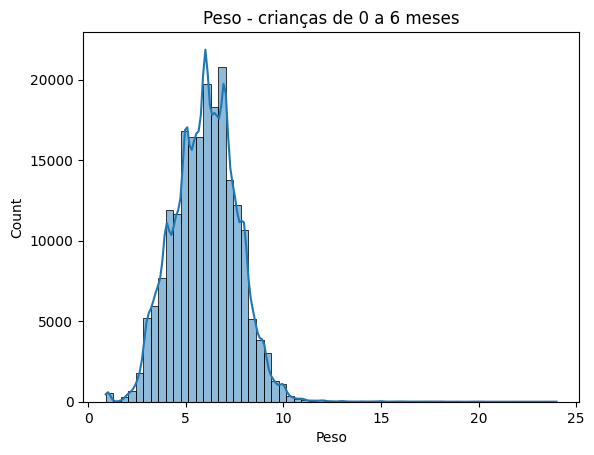

In [ ]:
sn.histplot(faixa_etaria_1['Peso'], bins=60, kde=True)
plt.title("Peso - crianças de 0 a 6 meses")
plt.show()

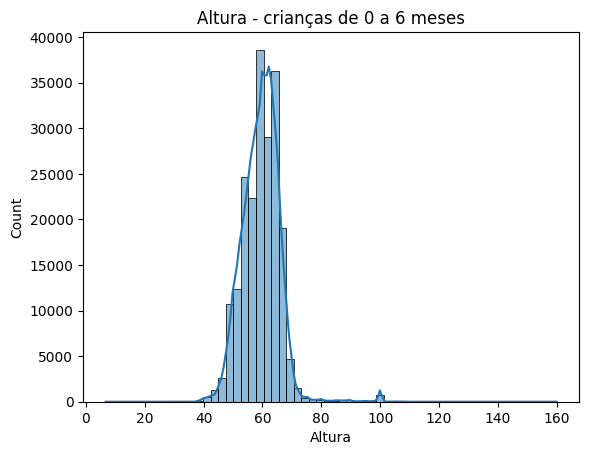

In [ ]:
sn.histplot(faixa_etaria_1['Altura'], bins=60, kde=True)
plt.title("Altura - crianças de 0 a 6 meses")
plt.show()

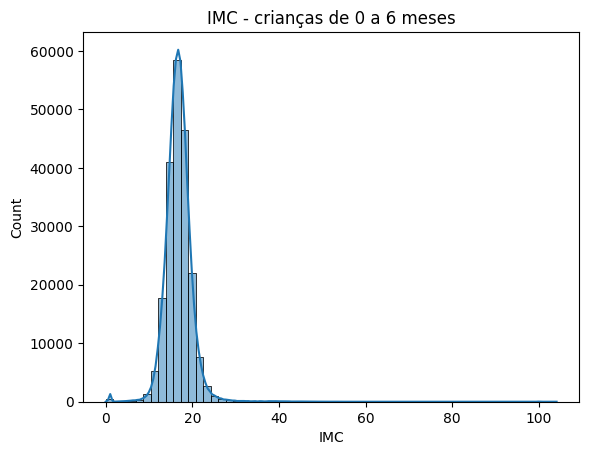

In [ ]:
sn.histplot(faixa_etaria_1['IMC'], bins=60, kde=True)
plt.title("IMC - crianças de 0 a 6 meses")
plt.show()

# Analisando a distribuição das variáveis categóricas

<ipython-input-76-00fcd8ce9afb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x='Estado', y='Contagem', data=contagem_UF, palette='ocean')


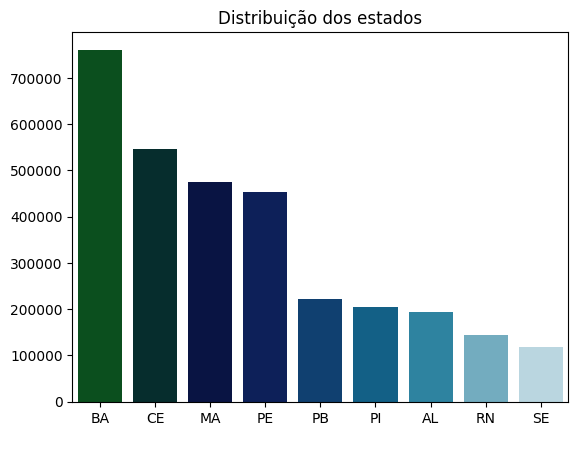

In [ ]:
contagem_UF = df_limpa['UF'].value_counts().reset_index()

contagem_UF.columns = ['Estado', 'Contagem']
sn.barplot(x='Estado', y='Contagem', data=contagem_UF, palette='ocean')

plt.title('Distribuição dos estados')
plt.xlabel(' ')
plt.ylabel('')

plt.show()

<ipython-input-77-dd1f84fab2b1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x='Faixa etária', y='Contagem', data=contagem_fase_da_vida, palette='ocean')


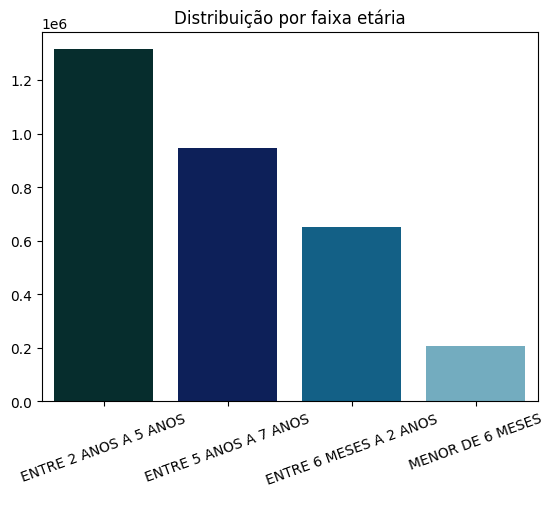

In [ ]:
contagem_fase_da_vida = df_limpa['Fase_da_vida'].value_counts().reset_index()

contagem_fase_da_vida.columns = ['Faixa etária', 'Contagem']
sn.barplot(x='Faixa etária', y='Contagem', data=contagem_fase_da_vida, palette='ocean')
plt.xticks(rotation=20)


plt.title('Distribuição por faixa etária')
plt.xlabel(' ')
plt.ylabel('')

plt.show()

<ipython-input-82-8ed265a578c1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x='Gênero', y='Contagem', data=contagem_genero, palette='ocean')


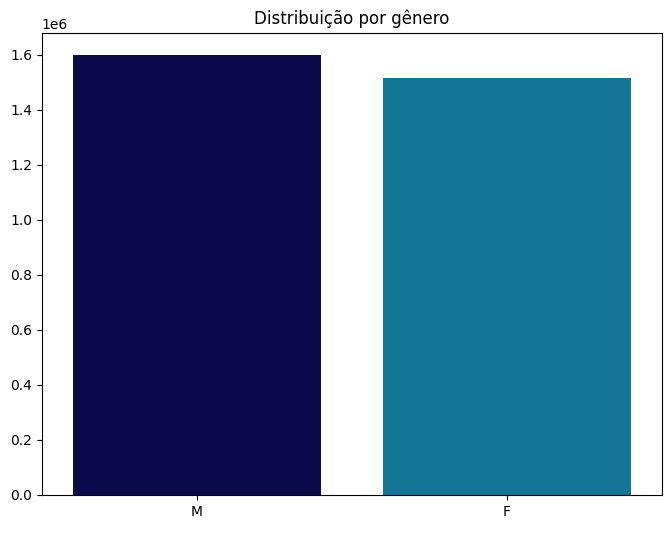

In [ ]:
contagem_genero = df_limpa['Gênero'].value_counts().reset_index()
plt.figure(figsize=(8,6))
contagem_genero.columns = ['Gênero', 'Contagem']
sn.barplot(x='Gênero', y='Contagem', data=contagem_genero, palette='ocean')

plt.title('Distribuição por gênero')
plt.xlabel(' ')
plt.ylabel('')

plt.show()


<ipython-input-79-154b7f2eafb9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x='Cor', y='Contagem', data=contagem_cor, palette='ocean')


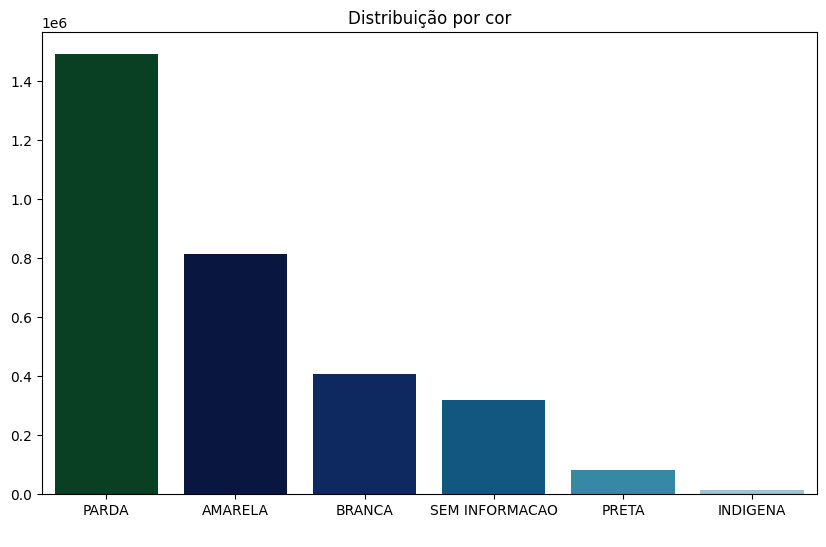

In [ ]:
contagem_cor = df_limpa['Cor'].value_counts().reset_index()
plt.figure(figsize = (10,6))
contagem_cor.columns = ['Cor', 'Contagem']
sn.barplot(x='Cor', y='Contagem', data=contagem_cor, palette='ocean')

plt.title('Distribuição por cor')
plt.xlabel(' ')
plt.ylabel('')

plt.show()

##Estado nutricional de peso para a idade

In [ ]:
print("Crianças com menos de 6 meses", end = "\n\n")
print(faixa_etaria_1['Estado_nutricional_de peso_para_idade'].value_counts())
print('-' * 40)
print("Crianças entre 6 meses a 2 anos", end = "\n\n")
print(faixa_etaria_2['Estado_nutricional_de peso_para_idade'].value_counts())
print('-' * 40)
print("Crianças entre 2 anos a 5 anos", end = "\n\n")
print(faixa_etaria_3['Estado_nutricional_de peso_para_idade'].value_counts())
print('-' * 40)
print("Crianças entre 5 anos a 7 anos", end = "\n\n")
print(faixa_etaria_4['Estado_nutricional_de peso_para_idade'].value_counts())


Crianças com menos de 6 meses

Estado_nutricional_de peso_para_idade
Peso adequado para idade         180374
Peso elevado para a idade         16937
Baixo peso para a idade            4973
Muito baixo peso para a idade      3990
Name: count, dtype: int64
----------------------------------------
Crianças entre 6 meses a 2 anos

Estado_nutricional_de peso_para_idade
Peso adequado para idade         564297
Peso elevado para a idade         60771
Baixo peso para a idade           15265
Muito baixo peso para a idade     11998
Name: count, dtype: int64
----------------------------------------
Crianças entre 2 anos a 5 anos

Estado_nutricional_de peso_para_idade
Peso adequado para idade         1125573
Peso elevado para a idade         122226
Baixo peso para a idade            43950
Muito baixo peso para a idade      21859
Name: count, dtype: int64
----------------------------------------
Crianças entre 5 anos a 7 anos

Estado_nutricional_de peso_para_idade
Peso adequado para idade         78

#### Percebemos que, em todas as quatro faixas etárias, a maior parte das crianças foram classicadas com peso adequado para a idade, enquanto a minoria delas apresenta peso muito baixo para a idade (o que é uma boa notícia).

##Estado nutricional de peso

In [ ]:
print("Crianças com menos de 6 meses", end = "\n\n")
print(faixa_etaria_1['Estado_nutricional_de_peso'].value_counts())
print('-' * 40)
print("Crianças entre 6 meses a 2 anos", end = "\n\n")
print(faixa_etaria_2['Estado_nutricional_de_peso'].value_counts())
print('-' * 40)
print("Crianças entre 2 anos a 5 anos", end = "\n\n")
print(faixa_etaria_3['Estado_nutricional_de_peso'].value_counts())
print('-' * 40)
print("Crianças entre 5 anos a 7 anos", end = "\n\n")
print(faixa_etaria_4['Estado_nutricional_de_peso'].value_counts())

Crianças com menos de 6 meses

Estado_nutricional_de_peso
Peso Adequado ou Eutrofico    132198
Risco de sobrepeso             34728
Sobrepeso                      14665
Obesidade                       9263
Magreza                         8853
Magreza acentuada               6567
Name: count, dtype: int64
----------------------------------------
Crianças entre 6 meses a 2 anos

Estado_nutricional_de_peso
Peso Adequado ou Eutrofico    373221
Risco de sobrepeso            135014
Sobrepeso                      62682
Obesidade                      45767
Magreza acentuada              19159
Magreza                        16512
Name: count, dtype: int64
----------------------------------------
Crianças entre 2 anos a 5 anos

Estado_nutricional_de_peso
Peso Adequado ou Eutrofico    806425
Risco de sobrepeso            202315
Obesidade                     124891
Sobrepeso                      93511
Magreza                        42683
Magreza acentuada              36985
Name: count, dtype: int

Obs: O termo "eutrofia" refere-se ao estado nutricional adequado, onde a criança apresenta um crescimento e desenvolvimento dentro dos padrões esperados para sua idade. Isso significa que a criança não está subnutrida nem apresenta excesso de peso, ou seja, possui um peso saudável e está crescendo conforme o esperado.

Com base na observação da distribuição dos dados, percebemos que:
* A maior parte das crianças apresenta peso adequado, em todas as quatro faixas etárias.
* Há mais casos de obesidade entre crianças com mais de 2 anos de idade.
* Há mais casos de mamagreza acentuada em crianças entre 6 meses a 2 anos de idade.

##Estado nutricional de altura para a idade





In [ ]:
print("Crianças com menos de 6 meses", end = "\n\n")
print(faixa_etaria_1['Estado_nutricional_de_altura_para_idade'].value_counts())
print('-' * 40)
print("Crianças entre 6 meses a 2 anos", end = "\n\n")
print(faixa_etaria_2['Estado_nutricional_de_altura_para_idade'].value_counts())
print('-' * 40)
print("Crianças entre 2 anos a 5 anos", end = "\n\n")
print(faixa_etaria_3['Estado_nutricional_de_altura_para_idade'].value_counts())
print('-' * 40)
print("Crianças entre 5 anos a 7 anos", end = "\n\n")
print(faixa_etaria_4['Estado_nutricional_de_altura_para_idade'].value_counts())

Crianças com menos de 6 meses

Estado_nutricional_de_altura_para_idade
Estatura adequada para a idade     187212
Baixa estatura para idade           10008
Muito baixa estatura para idade      9054
Name: count, dtype: int64
----------------------------------------
Crianças entre 6 meses a 2 anos

Estado_nutricional_de_altura_para_idade
Estatura adequada para a idade     547790
Muito baixa estatura para idade     52835
Baixa estatura para idade           51696
Name: count, dtype: int64
----------------------------------------
Crianças entre 2 anos a 5 anos

Estado_nutricional_de_altura_para_idade
Estatura adequada para a idade     1156643
Baixa estatura para idade            85190
Muito baixa estatura para idade      71730
Name: count, dtype: int64
----------------------------------------
Crianças entre 5 anos a 7 anos

Estado_nutricional_de_altura_para_idade
Estatura adequada para a idade     861832
Baixa estatura para idade           50136
Muito baixa estatura para idade     33270
Name

##Estado nutricional de IMC para a idade

In [ ]:
print("Crianças com menos de 6 meses", end = "\n\n")
print(faixa_etaria_1['Estado_nutricional_de_IMC_para_idade'].value_counts())
print('-' * 40)
print("Crianças entre 6 meses a 2 anos", end = "\n\n")
print(faixa_etaria_2['Estado_nutricional_de_IMC_para_idade'].value_counts())
print('-' * 40)
print("Crianças entre 2 anos a 5 anos", end = "\n\n")
print(faixa_etaria_3['Estado_nutricional_de_IMC_para_idade'].value_counts())
print('-' * 40)
print("Crianças entre 5 anos a 7 anos", end = "\n\n")
print(faixa_etaria_4['Estado_nutricional_de_IMC_para_idade'].value_counts())

Crianças com menos de 6 meses

Estado_nutricional_de_IMC_para_idade
Eutrofia              125012
Risco de sobrepeso     42244
Sobrepeso              17938
Obesidade               9482
Magreza                 6572
Magreza acentuada       5026
Name: count, dtype: int64
----------------------------------------
Crianças entre 6 meses a 2 anos

Estado_nutricional_de_IMC_para_idade
Eutrofia              337654
Risco de sobrepeso    140427
Sobrepeso              74337
Obesidade              56651
Magreza acentuada      24795
Magreza                18491
Name: count, dtype: int64
----------------------------------------
Crianças entre 2 anos a 5 anos

Estado_nutricional_de_IMC_para_idade
Eutrofia              800996
Risco de sobrepeso    194531
Obesidade             109208
Sobrepeso              99125
Magreza                55651
Magreza acentuada      54106
Name: count, dtype: int64
----------------------------------------
Crianças entre 5 anos a 7 anos

Estado_nutricional_de_IMC_para_idade
E

# Correlações

## Correlação das variáveis numéricas

In [95]:
df_variaveis_numericas = df_limpa.select_dtypes(include=['number'])

In [96]:
df_variaveis_numericas.corr()

,Idade,Peso,Altura,IMC
Idade,1.000000,0.680567,0.865018,-0.120867
Peso,0.680567,1.000000,0.716232,0.237640
Altura,0.865018,0.716232,1.000000,-0.189214
IMC,-0.120867,0.237640,-0.189214,1.000000


##Correlação das variáveis categóricas